# MODELI

# FeedForward

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
import os
import numpy as np

import random
os.environ['PYTHONHASHSEED'] = '0'
random.seed(10)
np.random.seed(10)
import tensorflow as tf
tf.random.set_seed(10)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [3]:
def load_dataset(path):
    data = np.load(path)
    X_train = data['X_train']
    y_train = data['y_train']
    X_val = data['X_val']
    y_val = data['y_val']
    X_test = data['X_test']
    y_test = data['y_test']
    print(f"Dataset loaded from {path}")
    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset('my_dataset.npz')

Dataset loaded from my_dataset.npz


In [4]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
import numpy as np
import random
import os

import os
import random
import numpy as np
os.environ['PYTHONHASHSEED'] = '0'
random.seed(0)
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'



modelff = Sequential()
modelff.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
modelff.add(Dense(128, activation='relu'))
modelff.add(BatchNormalization())
modelff.add(Dropout(0.3))
modelff.add(Dense(64, activation='relu'))
modelff.add(Dense(y_train.shape[1], activation='softmax'))

modelff.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = modelff.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])


In [50]:
modelff.evaluate(X_train, y_train)
modelff.evaluate(X_val, y_val)
modelff.evaluate(X_test, y_test)

7/7 [==============================] - 0s 11ms/step - loss: 2.6671 - categorical_accuracy: 0.2950


[2.667135238647461, 0.29499998688697815]

In [51]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [53]:
yhat = modelff.predict(X_test)

7/7 [==============================] - 0s 8ms/step


In [54]:
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

In [57]:
from sklearn.metrics import classification_report
actions = np.array(['Ja','Mogu','Riba','Sve','Momak','Devojka','Opasno','Kada','Zasto','Hvala'])

print(classification_report(ytrue, yhat, target_names=actions))

              precision    recall  f1-score   support

          Ja       0.00      0.00      0.00        20
        Mogu       0.89      0.40      0.55        20
        Riba       0.60      0.60      0.60        20
         Sve       0.46      0.90      0.61        20
       Momak       0.00      0.00      0.00        20
     Devojka       0.00      0.00      0.00        20
      Opasno       0.30      1.00      0.47        20
        Kada       0.00      0.00      0.00        20
       Zasto       0.00      0.00      0.00        20
       Hvala       0.02      0.05      0.03        20

    accuracy                           0.29       200
   macro avg       0.23      0.29      0.23       200
weighted avg       0.23      0.29      0.23       200



C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[180,   0],
        [ 20,   0]],

       [[179,   1],
        [ 12,   8]],

       [[172,   8],
        [  8,  12]],

       [[159,  21],
        [  2,  18]],

       [[180,   0],
        [ 20,   0]],

       [[180,   0],
        [ 20,   0]],

       [[134,  46],
        [  0,  20]],

       [[172,   8],
        [ 20,   0]],

       [[180,   0],
        [ 20,   0]],

       [[123,  57],
        [ 19,   1]]], dtype=int64)

In [58]:
print(f"Best epoch by val_loss (restored): {np.argmin(history.history['val_loss']) + 1}")

Best epoch by val_loss (restored): 24


In [59]:
epoch = 24
print(f"Best epoch by val_loss (restored): {np.argmin(history.history['val_loss']) + 1}")
print(f"Loss at epoch {epoch}: {history.history['loss'][epoch-1]}")
print(f"Training accuracy at epoch {epoch}: {history.history['categorical_accuracy'][epoch-1]}")
print(f"Validation loss at epoch {epoch}: {history.history['val_loss'][epoch-1]}")
print(f"Validation accuracy at epoch {epoch}: {history.history['val_categorical_accuracy'][epoch-1]}")

Loss at epoch 24: 0.42227593064308167
Training accuracy at epoch 24: 0.9666666388511658
Validation loss at epoch 24: 1.9045644998550415
Validation accuracy at epoch 24: 0.38999998569488525


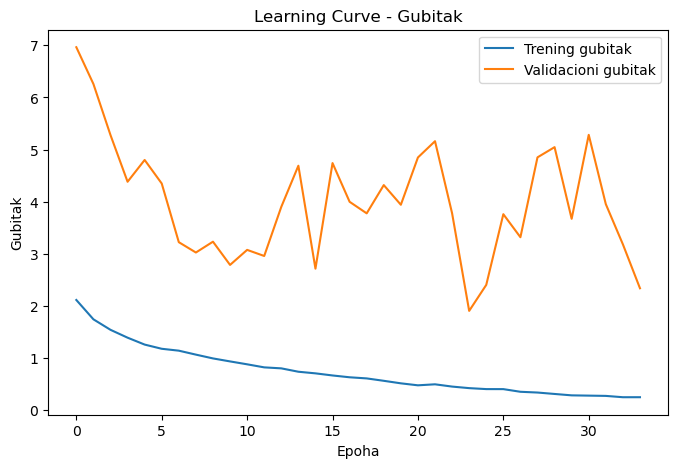

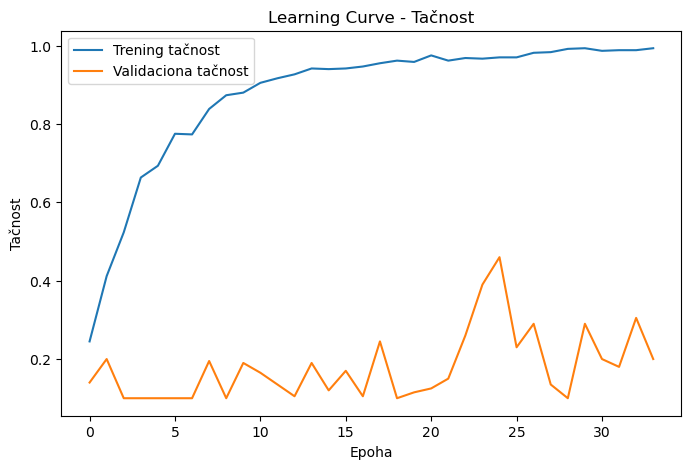

In [60]:
import matplotlib.pyplot as plt


# Prikaz gubitka (loss)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Trening gubitak')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validacioni gubitak')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.title('Learning Curve - Gubitak')
plt.legend()
plt.show()

# Prikaz tačnosti (accuracy)
plt.figure(figsize=(8, 5))
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Trening tačnost')
if 'categorical_accuracy' in history.history:
    plt.plot(history.history['categorical_accuracy'], label='Trening tačnost')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validaciona tačnost')
if 'val_categorical_accuracy' in history.history:
    plt.plot(history.history['val_categorical_accuracy'], label='Validaciona tačnost')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.title('Learning Curve - Tačnost')
plt.legend()
plt.show()

# RNN

In [61]:
modelff.save("feedf.h5")

In [109]:
# Example: Simple RNN for gesture recognition
from tensorflow.keras.layers import LSTM, BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers


input_shape = (35, 1662)
inputs = Input(shape=input_shape)
x = SimpleRNN(64, return_sequences=True, activation='tanh')(inputs)
x = Flatten()(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.2)(x)
outputs = Dense(y_train.shape[1], activation='softmax')(x)
model9 = Model(inputs, outputs)
model9.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model9.fit(X_train, y_train, epochs=100, batch_size=32 ,validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/100
19/19 [==============================] - 3s 44ms/step - loss: 2.6952 - categorical_accuracy: 0.1333 - val_loss: 2.5065 - val_categorical_accuracy: 0.2000
Epoch 2/100
19/19 [==============================] - 0s 24ms/step - loss: 2.5198 - categorical_accuracy: 0.1133 - val_loss: 2.4027 - val_categorical_accuracy: 0.2350
Epoch 3/100
19/19 [==============================] - 0s 24ms/step - loss: 2.4074 - categorical_accuracy: 0.1383 - val_loss: 2.3711 - val_categorical_accuracy: 0.1600
Epoch 4/100
19/19 [==============================] - 0s 23ms/step - loss: 2.3490 - categorical_accuracy: 0.1583 - val_loss: 2.3483 - val_categorical_accuracy: 0.1850
Epoch 5/100
19/19 [==============================] - 0s 23ms/step - loss: 2.3411 - categorical_accuracy: 0.1650 - val_loss: 2.3265 - val_categorical_accuracy: 0.1800
Epoch 6/100
19/19 [==============================] - 0s 23ms/step - loss: 2.2992 - categorical_accuracy: 0.2100 - val_loss: 2.3077 - val_categorical_accuracy: 0.2150
Epoc

In [110]:
model9.evaluate(X_train, y_train)
model9.evaluate(X_val, y_val)
model9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 11ms/step - loss: 1.7996 - categorical_accuracy: 0.4500


[1.799558162689209, 0.44999998807907104]

In [111]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [112]:
yhat = model9.predict(X_test)

7/7 [==============================] - 0s 11ms/step


In [113]:
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

In [114]:
from sklearn.metrics import classification_report
actions = np.array(['Ja','Mogu','Riba','Sve','Momak','Devojka','Opasno','Kada','Zasto','Hvala'])

print(classification_report(ytrue, yhat, target_names=actions))

              precision    recall  f1-score   support

          Ja       1.00      0.30      0.46        20
        Mogu       0.70      0.70      0.70        20
        Riba       1.00      0.55      0.71        20
         Sve       0.88      0.75      0.81        20
       Momak       0.00      0.00      0.00        20
     Devojka       0.27      1.00      0.43        20
      Opasno       0.31      0.40      0.35        20
        Kada       0.09      0.05      0.06        20
       Zasto       0.52      0.70      0.60        20
       Hvala       0.33      0.05      0.09        20

    accuracy                           0.45       200
   macro avg       0.51      0.45      0.42       200
weighted avg       0.51      0.45      0.42       200



In [105]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[180,   0],
        [  0,  20]],

       [[177,   3],
        [ 14,   6]],

       [[178,   2],
        [  9,  11]],

       [[179,   1],
        [ 18,   2]],

       [[174,   6],
        [ 20,   0]],

       [[180,   0],
        [ 15,   5]],

       [[153,  27],
        [  4,  16]],

       [[151,  29],
        [  8,  12]],

       [[146,  34],
        [  3,  17]],

       [[173,   7],
        [ 18,   2]]], dtype=int64)

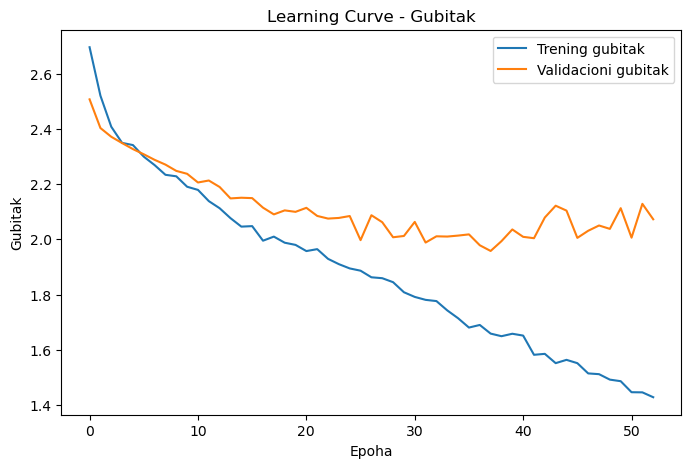

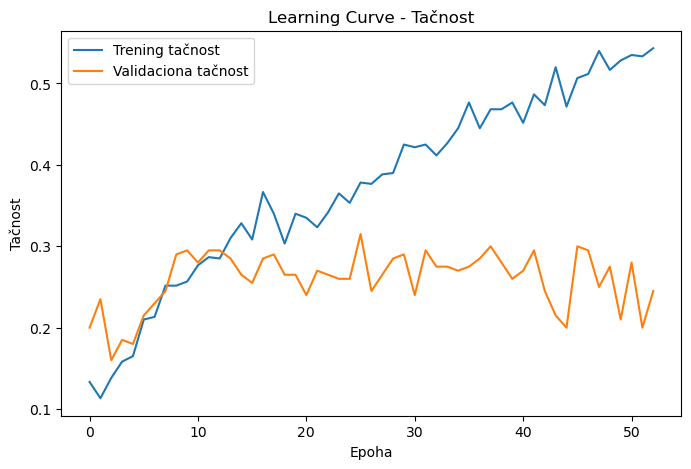

In [115]:
import matplotlib.pyplot as plt

# Pretpostavljamo da ste trenirali model ovako:
# history = model.fit(...)

# Prikaz gubitka (loss)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Trening gubitak')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validacioni gubitak')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.title('Learning Curve - Gubitak')
plt.legend()
plt.show()

# Prikaz tačnosti (accuracy)
plt.figure(figsize=(8, 5))
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Trening tačnost')
if 'categorical_accuracy' in history.history:
    plt.plot(history.history['categorical_accuracy'], label='Trening tačnost')
if 'val_accuracy' in history1.history:
    plt.plot(history.history['val_accuracy'], label='Validaciona tačnost')
if 'val_categorical_accuracy' in history.history:
    plt.plot(history.history['val_categorical_accuracy'], label='Validaciona tačnost')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.title('Learning Curve - Tačnost')
plt.legend()
plt.show()

In [116]:
print(f"Best epoch by val_loss (restored): {np.argmin(history.history['val_loss']) + 1}")

Best epoch by val_loss (restored): 38


In [125]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(ytrue, yhat)
class_names = ['Ja', 'Mogu', 'Riba', 'Sve', 'Momak', 'Devojka', 'Opasno', 'Kada', 'Zasto', 'Hvala']

for i, (matrix, class_name) in enumerate(zip(mcm, class_names)):
    print(f"'{class_name}':")
    print(matrix)
    print()
    

'Ja':
[[180   0]
 [ 14   6]]

'Mogu':
[[174   6]
 [  6  14]]

'Riba':
[[180   0]
 [  9  11]]

'Sve':
[[178   2]
 [  5  15]]

'Momak':
[[175   5]
 [ 20   0]]

'Devojka':
[[126  54]
 [  0  20]]

'Opasno':
[[162  18]
 [ 12   8]]

'Kada':
[[170  10]
 [ 19   1]]

'Zasto':
[[167  13]
 [  6  14]]

'Hvala':
[[178   2]
 [ 19   1]]



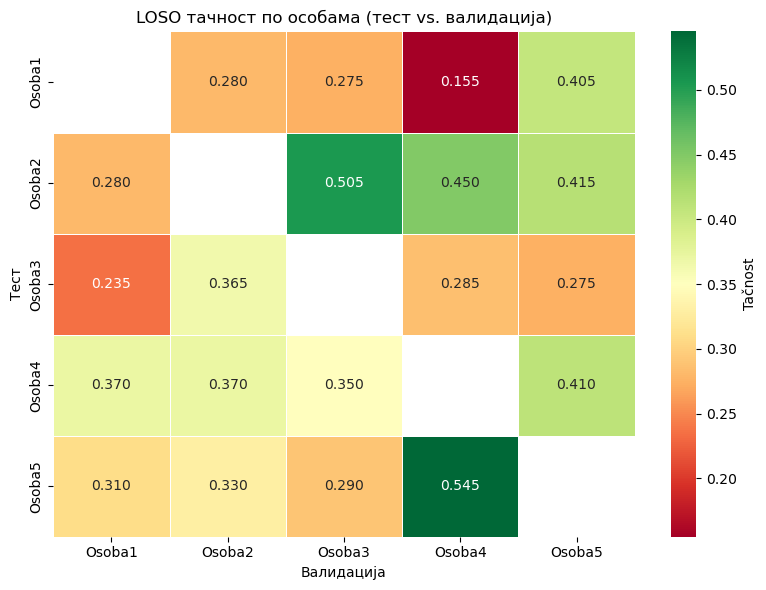

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Osoba1': [None, 0.28, 0.235, 0.37, 0.31],
    'Osoba2': [0.28, None, 0.365, 0.37, 0.33],
    'Osoba3': [0.275, 0.505, None, 0.35, 0.29],
    'Osoba4': [0.155, 0.45, 0.285, None, 0.545],
    'Osoba5': [0.405, 0.415, 0.275, 0.41, None],
}
index_labels = ['Osoba1', 'Osoba2', 'Osoba3', 'Osoba4', 'Osoba5']
df = pd.DataFrame(data, index=index_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="RdYlGn", fmt=".3f", linewidths=0.5, cbar_kws={'label': 'Tačnost'})
plt.title("LOSO тачност по особама (тест vs. валидација)")
plt.xlabel("Валидација")
plt.ylabel("Тест")
plt.tight_layout()
plt.show()

# 1D CNN

In [271]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model34 = Sequential()
model34.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(35, 1662)))
model34.add(MaxPooling1D(pool_size=2))
model34.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model34.add(MaxPooling1D(pool_size=2))
model34.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model34.add(MaxPooling1D(pool_size=2))
model34.add(Flatten())
model34.add(Dense(256, activation='relu'))
model34.add(Dropout(0.5))
model34.add(Dense(64, activation='relu'))
model34.add(Dense(10, activation='softmax'))

model34.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history11d = model34.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[tb_callback, early_stop]
    )

Epoch 1/150
10/10 [==============================] - 3s 127ms/step - loss: 2.3205 - categorical_accuracy: 0.1133 - val_loss: 2.3019 - val_categorical_accuracy: 0.1000
Epoch 2/150
10/10 [==============================] - 1s 93ms/step - loss: 2.3018 - categorical_accuracy: 0.1067 - val_loss: 2.2937 - val_categorical_accuracy: 0.1000
Epoch 3/150
10/10 [==============================] - 1s 95ms/step - loss: 2.3003 - categorical_accuracy: 0.1233 - val_loss: 2.2874 - val_categorical_accuracy: 0.1200
Epoch 4/150
10/10 [==============================] - 1s 91ms/step - loss: 2.2940 - categorical_accuracy: 0.1217 - val_loss: 2.2837 - val_categorical_accuracy: 0.1400
Epoch 5/150
10/10 [==============================] - 1s 92ms/step - loss: 2.2814 - categorical_accuracy: 0.1533 - val_loss: 2.2814 - val_categorical_accuracy: 0.1500
Epoch 6/150
10/10 [==============================] - 1s 98ms/step - loss: 2.2776 - categorical_accuracy: 0.1433 - val_loss: 2.2792 - val_categorical_accuracy: 0.1450
Epo

10/10 [==============================] - 1s 112ms/step - loss: 1.7809 - categorical_accuracy: 0.3367 - val_loss: 1.8883 - val_categorical_accuracy: 0.2550
Epoch 51/150
10/10 [==============================] - 1s 109ms/step - loss: 1.7815 - categorical_accuracy: 0.3633 - val_loss: 1.8581 - val_categorical_accuracy: 0.3000
Epoch 52/150
10/10 [==============================] - 1s 104ms/step - loss: 1.7596 - categorical_accuracy: 0.3567 - val_loss: 1.8708 - val_categorical_accuracy: 0.2700
Epoch 53/150
10/10 [==============================] - 1s 107ms/step - loss: 1.7736 - categorical_accuracy: 0.3550 - val_loss: 1.8435 - val_categorical_accuracy: 0.2650
Epoch 54/150
10/10 [==============================] - 1s 106ms/step - loss: 1.7643 - categorical_accuracy: 0.3667 - val_loss: 1.8498 - val_categorical_accuracy: 0.2600
Epoch 55/150
10/10 [==============================] - 1s 104ms/step - loss: 1.7630 - categorical_accuracy: 0.3417 - val_loss: 1.8511 - val_categorical_accuracy: 0.2600
Epoch

Epoch 99/150
10/10 [==============================] - 1s 112ms/step - loss: 1.4589 - categorical_accuracy: 0.4917 - val_loss: 1.7180 - val_categorical_accuracy: 0.2500
Epoch 100/150
10/10 [==============================] - 1s 121ms/step - loss: 1.4777 - categorical_accuracy: 0.4317 - val_loss: 1.7530 - val_categorical_accuracy: 0.2550
Epoch 101/150
10/10 [==============================] - 1s 114ms/step - loss: 1.4765 - categorical_accuracy: 0.4633 - val_loss: 1.7038 - val_categorical_accuracy: 0.2750
Epoch 102/150
10/10 [==============================] - 1s 111ms/step - loss: 1.4698 - categorical_accuracy: 0.4750 - val_loss: 1.7375 - val_categorical_accuracy: 0.2700
Epoch 103/150
10/10 [==============================] - 1s 121ms/step - loss: 1.4611 - categorical_accuracy: 0.4567 - val_loss: 1.7083 - val_categorical_accuracy: 0.2800
Epoch 104/150
10/10 [==============================] - 1s 107ms/step - loss: 1.4362 - categorical_accuracy: 0.5000 - val_loss: 1.7330 - val_categorical_accu

In [272]:
model34.evaluate(X_train, y_train)
model34.evaluate(X_val, y_val)
model34.evaluate(X_test, y_test)

7/7 [==============================] - 1s 29ms/step - loss: 1.3146 - categorical_accuracy: 0.5650


[1.3145675659179688, 0.5649999976158142]

In [274]:
epoch = np.argmin(history11d.history['val_loss']) + 1
print(f"Best epoch by val_loss (restored): {epoch}")
print(f"Loss at epoch {epoch}: {history11d.history['loss'][epoch-1]}")
print(f"Training accuracy at epoch {epoch}: {history11d.history['categorical_accuracy'][epoch-1]}")
print(f"Validation loss at epoch {epoch}: {history11d.history['val_loss'][epoch-1]}")
print(f"Validation accuracy at epoch {epoch}: {history11d.history['val_categorical_accuracy'][epoch-1]}")

Best epoch by val_loss (restored): 130
Loss at epoch 130: 1.2700594663619995
Training accuracy at epoch 130: 0.5649999976158142
Validation loss at epoch 130: 1.6825660467147827
Validation accuracy at epoch 130: 0.3199999928474426


In [275]:
yhat = model34.predict(X_test)
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

7/7 [==============================] - 0s 21ms/step


In [276]:
from sklearn.metrics import classification_report
actions = np.array(['Ja','Mogu','Riba','Sve','Momak','Devojka','Opasno','Kada','Zasto','Hvala'])

print(classification_report(ytrue, yhat, target_names=actions))

              precision    recall  f1-score   support

          Ja       1.00      0.20      0.33        20
        Mogu       1.00      0.10      0.18        20
        Riba       0.90      0.95      0.93        20
         Sve       0.74      0.85      0.79        20
       Momak       0.50      0.05      0.09        20
     Devojka       0.54      1.00      0.70        20
      Opasno       0.53      0.90      0.67        20
        Kada       0.52      0.60      0.56        20
       Zasto       0.53      1.00      0.69        20
       Hvala       0.00      0.00      0.00        20

    accuracy                           0.56       200
   macro avg       0.63      0.56      0.49       200
weighted avg       0.63      0.56      0.49       200



In [277]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(ytrue, yhat)
class_names = ['Ja', 'Mogu', 'Riba', 'Sve', 'Momak', 'Devojka', 'Opasno', 'Kada', 'Zasto', 'Hvala']

for i, (matrix, class_name) in enumerate(zip(mcm, class_names)):
    print(f"'{class_name}':")
    print(matrix)
    print()
    

'Ja':
[[180   0]
 [ 16   4]]

'Mogu':
[[180   0]
 [ 18   2]]

'Riba':
[[178   2]
 [  1  19]]

'Sve':
[[174   6]
 [  3  17]]

'Momak':
[[179   1]
 [ 19   1]]

'Devojka':
[[163  17]
 [  0  20]]

'Opasno':
[[164  16]
 [  2  18]]

'Kada':
[[169  11]
 [  8  12]]

'Zasto':
[[162  18]
 [  0  20]]

'Hvala':
[[164  16]
 [ 20   0]]



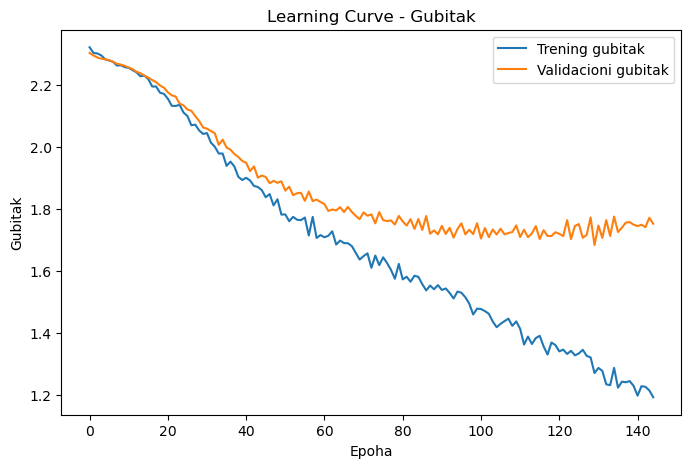

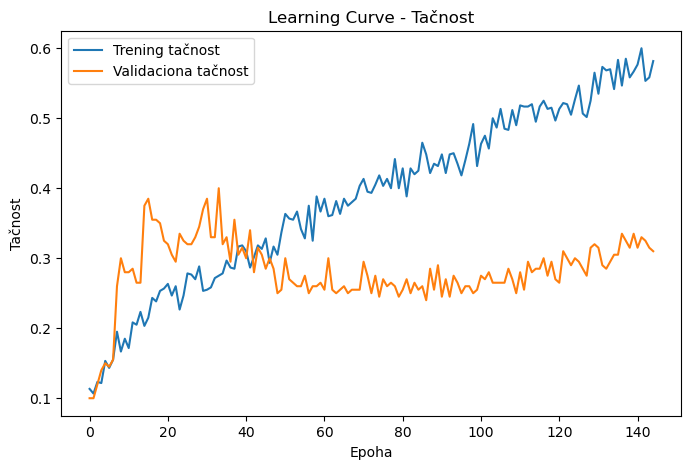

In [278]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history11d.history['loss'], label='Trening gubitak')
if 'val_loss' in history11d.history:
    plt.plot(history11d.history['val_loss'], label='Validacioni gubitak')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.title('Learning Curve - Gubitak')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
if 'accuracy' in history11d.history:
    plt.plot(history11d.history['accuracy'], label='Trening tačnost')
if 'categorical_accuracy' in history11d.history:
    plt.plot(history11d.history['categorical_accuracy'], label='Trening tačnost')
if 'val_accuracy' in history11d.history:
    plt.plot(history11d.history['val_accuracy'], label='Validaciona tačnost')
if 'val_categorical_accuracy' in history11d.history:
    plt.plot(history11d.history['val_categorical_accuracy'], label='Validaciona tačnost')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.title('Learning Curve - Tačnost')
plt.legend()
plt.show()

# LSTM

In [380]:
model5 = Sequential()
model5.add(LSTM(256, return_sequences=True, activation='tanh', input_shape=(35,1662)))
model5.add(LSTM(128, return_sequences=True, activation='tanh'))
model5.add(LSTM(64, return_sequences=False, activation='tanh'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(y_train.shape[1], activation='softmax'))
model5.compile(optimizer=Adam(0.0003), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
histtt = model5.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[tb_callback, early_stop]
    )

Epoch 1/100
10/10 [==============================] - 22s 2s/step - loss: 2.2897 - categorical_accuracy: 0.1150 - val_loss: 2.1761 - val_categorical_accuracy: 0.1200
Epoch 2/100
10/10 [==============================] - 16s 2s/step - loss: 2.0844 - categorical_accuracy: 0.2417 - val_loss: 1.9982 - val_categorical_accuracy: 0.3000
Epoch 3/100
10/10 [==============================] - 14s 1s/step - loss: 1.9376 - categorical_accuracy: 0.2567 - val_loss: 1.8796 - val_categorical_accuracy: 0.3100
Epoch 4/100
10/10 [==============================] - 14s 1s/step - loss: 1.8214 - categorical_accuracy: 0.2883 - val_loss: 1.8907 - val_categorical_accuracy: 0.2600
Epoch 5/100
10/10 [==============================] - 14s 1s/step - loss: 1.7555 - categorical_accuracy: 0.3050 - val_loss: 1.7423 - val_categorical_accuracy: 0.2850
Epoch 6/100
10/10 [==============================] - 16s 2s/step - loss: 1.6899 - categorical_accuracy: 0.3200 - val_loss: 1.9832 - val_categorical_accuracy: 0.2400
Epoch 7/10

In [381]:
model5.evaluate(X_train, y_train)
model5.evaluate(X_val, y_val)
model5.evaluate(X_test, y_test)

7/7 [==============================] - 3s 270ms/step - loss: 1.7221 - categorical_accuracy: 0.4100


[1.7221364974975586, 0.4099999964237213]

In [382]:
epoch = np.argmin(histtt.history['val_loss']) + 1
print(f"Best epoch by val_loss (restored): {epoch}")
print(f"Loss at epoch {epoch}: {histtt.history['loss'][epoch-1]}")
print(f"Training accuracy at epoch {epoch}: {histtt.history['categorical_accuracy'][epoch-1]}")
print(f"Validation loss at epoch {epoch}: {histtt.history['val_loss'][epoch-1]}")
print(f"Validation accuracy at epoch {epoch}: {histtt.history['val_categorical_accuracy'][epoch-1]}")

Best epoch by val_loss (restored): 9
Loss at epoch 9: 1.545638084411621
Training accuracy at epoch 9: 0.4266666769981384
Validation loss at epoch 9: 1.5300554037094116
Validation accuracy at epoch 9: 0.3799999952316284


In [383]:
yhat = model5.predict(X_test)
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

7/7 [==============================] - 4s 277ms/step


In [384]:
from sklearn.metrics import classification_report
actions = np.array(['Ja','Mogu','Riba','Sve','Momak','Devojka','Opasno','Kada','Zasto','Hvala'])

print(classification_report(ytrue, yhat, target_names=actions))

              precision    recall  f1-score   support

          Ja       0.00      0.00      0.00        20
        Mogu       1.00      0.90      0.95        20
        Riba       1.00      0.75      0.86        20
         Sve       0.00      0.00      0.00        20
       Momak       0.25      0.85      0.39        20
     Devojka       1.00      0.05      0.10        20
      Opasno       0.00      0.00      0.00        20
        Kada       0.00      0.00      0.00        20
       Zasto       0.43      1.00      0.60        20
       Hvala       0.21      0.55      0.31        20

    accuracy                           0.41       200
   macro avg       0.39      0.41      0.32       200
weighted avg       0.39      0.41      0.32       200



C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [385]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(ytrue, yhat)
class_names = ['Ja', 'Mogu', 'Riba', 'Sve', 'Momak', 'Devojka', 'Opasno', 'Kada', 'Zasto', 'Hvala']

for i, (matrix, class_name) in enumerate(zip(mcm, class_names)):
    print(f"'{class_name}':")
    print(matrix)
    print()
    

'Ja':
[[180   0]
 [ 20   0]]

'Mogu':
[[180   0]
 [  2  18]]

'Riba':
[[180   0]
 [  5  15]]

'Sve':
[[180   0]
 [ 20   0]]

'Momak':
[[130  50]
 [  3  17]]

'Devojka':
[[180   0]
 [ 19   1]]

'Opasno':
[[180   0]
 [ 20   0]]

'Kada':
[[180   0]
 [ 20   0]]

'Zasto':
[[153  27]
 [  0  20]]

'Hvala':
[[139  41]
 [  9  11]]



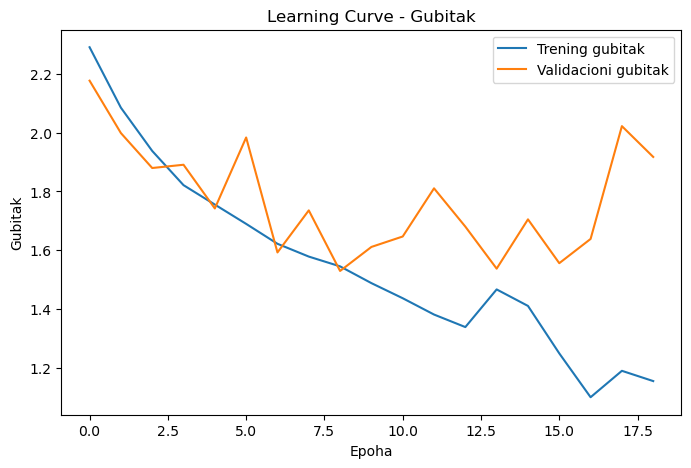

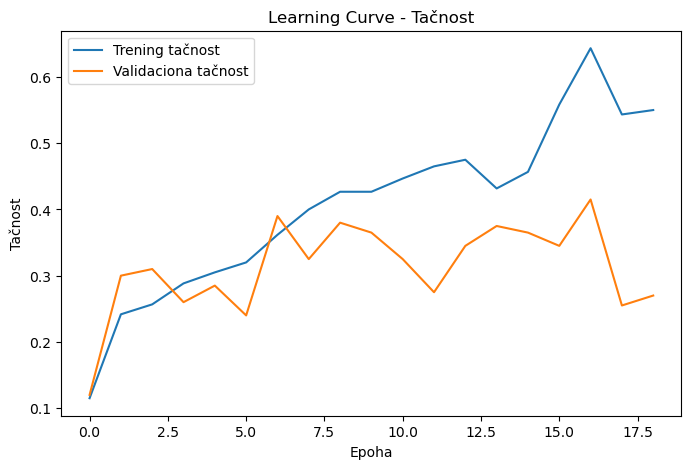

In [386]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(histtt.history['loss'], label='Trening gubitak')
if 'val_loss' in histtt.history:
    plt.plot(histtt.history['val_loss'], label='Validacioni gubitak')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.title('Learning Curve - Gubitak')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
if 'accuracy' in histtt.history:
    plt.plot(histtt.history['accuracy'], label='Trening tačnost')
if 'categorical_accuracy' in history.history:
    plt.plot(histtt.history['categorical_accuracy'], label='Trening tačnost')
if 'val_accuracy' in histtt.history:
    plt.plot(histtt.history['val_accuracy'], label='Validaciona tačnost')
if 'val_categorical_accuracy' in histtt.history:
    plt.plot(histtt.history['val_categorical_accuracy'], label='Validaciona tačnost')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.title('Learning Curve - Tačnost')
plt.legend()
plt.show()

# TRANSFORMER 

In [365]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, MultiHeadAttention, GlobalAveragePooling1D, Dense

input_shape = (35, 1662)
inputs = Input(shape=input_shape)

# MultiHeadAttention блок
x = MultiHeadAttention(num_heads=5, key_dim=64)(inputs, inputs)

# Сажимање
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
# Излазни слој
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [366]:
hiii = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/50
19/19 [==============================] - 5s 168ms/step - loss: 2.6708 - categorical_accuracy: 0.1450 - val_loss: 2.3152 - val_categorical_accuracy: 0.2000
Epoch 2/50
19/19 [==============================] - 3s 156ms/step - loss: 1.9652 - categorical_accuracy: 0.2500 - val_loss: 1.7754 - val_categorical_accuracy: 0.2650
Epoch 3/50
19/19 [==============================] - 3s 155ms/step - loss: 1.6910 - categorical_accuracy: 0.3183 - val_loss: 1.6477 - val_categorical_accuracy: 0.3050
Epoch 4/50
19/19 [==============================] - 3s 154ms/step - loss: 1.5669 - categorical_accuracy: 0.4000 - val_loss: 1.4134 - val_categorical_accuracy: 0.3900
Epoch 5/50
19/19 [==============================] - 3s 160ms/step - loss: 1.2730 - categorical_accuracy: 0.4917 - val_loss: 1.6378 - val_categorical_accuracy: 0.4550
Epoch 6/50
19/19 [==============================] - 3s 146ms/step - loss: 1.0854 - categorical_accuracy: 0.5633 - val_loss: 2.4248 - val_categorical_accuracy: 0.2950
Epoc

In [367]:
model.evaluate(X_train, y_train)
model.evaluate(X_val, y_val)
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 61ms/step - loss: 1.5799 - categorical_accuracy: 0.4150


[1.5799082517623901, 0.41499999165534973]

In [389]:
model.summary()

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 35, 1662)]   0           []                               
                                                                                                  
 multi_head_attention_16 (Multi  (None, 35, 1662)    2129982     ['input_36[0][0]',               
 HeadAttention)                                                   'input_36[0][0]']               
                                                                                                  
 global_average_pooling1d_34 (G  (None, 1662)        0           ['multi_head_attention_16[0][0]']
 lobalAveragePooling1D)                                                                           
                                                                                           

In [387]:
epoch = np.argmin(hiii.history['val_loss']) + 1
print(f"Best epoch by val_loss (restored): {epoch}")
print(f"Loss at epoch {epoch}: {hiii.history['loss'][epoch-1]}")
print(f"Training accuracy at epoch {epoch}: {hiii.history['categorical_accuracy'][epoch-1]}")
print(f"Validation loss at epoch {epoch}: {hiii.history['val_loss'][epoch-1]}")
print(f"Validation accuracy at epoch {epoch}: {hiii.history['val_categorical_accuracy'][epoch-1]}")

Best epoch by val_loss (restored): 4
Loss at epoch 4: 1.5668625831604004
Training accuracy at epoch 4: 0.4000000059604645
Validation loss at epoch 4: 1.413435935974121
Validation accuracy at epoch 4: 0.38999998569488525


In [390]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

7/7 [==============================] - 1s 64ms/step


In [391]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(ytrue, yhat)
class_names = ['Ja', 'Mogu', 'Riba', 'Sve', 'Momak', 'Devojka', 'Opasno', 'Kada', 'Zasto', 'Hvala']

for i, (matrix, class_name) in enumerate(zip(mcm, class_names)):
    print(f"'{class_name}':")
    print(matrix)
    print()
    

'Ja':
[[174   6]
 [ 19   1]]

'Mogu':
[[180   0]
 [ 20   0]]

'Riba':
[[177   3]
 [  1  19]]

'Sve':
[[180   0]
 [ 20   0]]

'Momak':
[[177   3]
 [ 19   1]]

'Devojka':
[[180   0]
 [ 20   0]]

'Opasno':
[[165  15]
 [  2  18]]

'Kada':
[[144  36]
 [  2  18]]

'Zasto':
[[147  33]
 [  1  19]]

'Hvala':
[[159  21]
 [ 13   7]]



In [392]:
from sklearn.metrics import classification_report
actions = np.array(['Ja','Mogu','Riba','Sve','Momak','Devojka','Opasno','Kada','Zasto','Hvala'])

print(classification_report(ytrue, yhat, target_names=actions))

              precision    recall  f1-score   support

          Ja       0.14      0.05      0.07        20
        Mogu       0.00      0.00      0.00        20
        Riba       0.86      0.95      0.90        20
         Sve       0.00      0.00      0.00        20
       Momak       0.25      0.05      0.08        20
     Devojka       0.00      0.00      0.00        20
      Opasno       0.55      0.90      0.68        20
        Kada       0.33      0.90      0.49        20
       Zasto       0.37      0.95      0.53        20
       Hvala       0.25      0.35      0.29        20

    accuracy                           0.41       200
   macro avg       0.28      0.41      0.30       200
weighted avg       0.28      0.41      0.30       200



C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U6071516\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


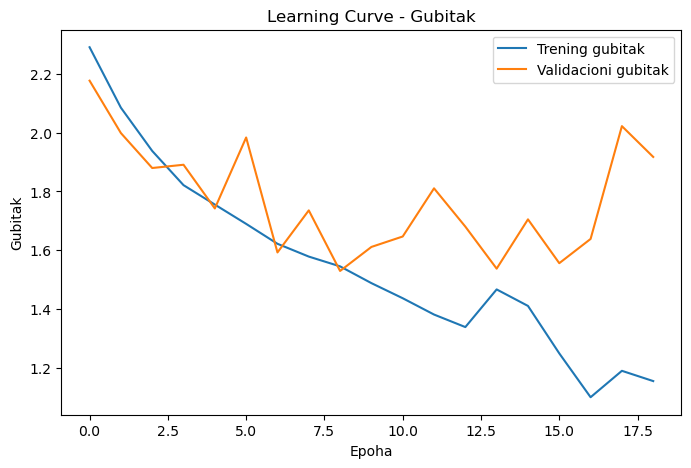

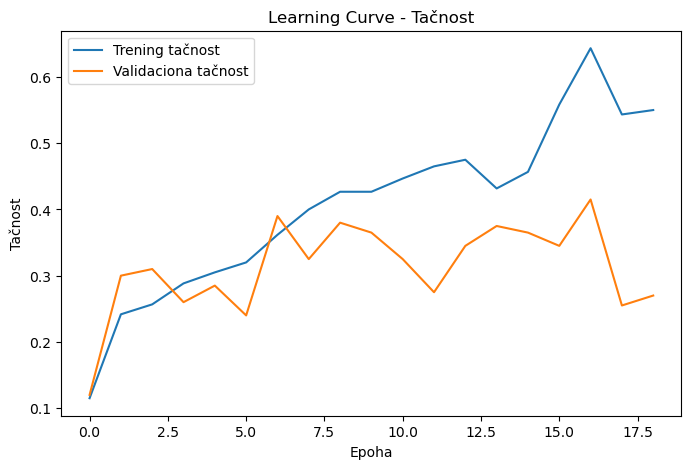

In [393]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(histtt.history['loss'], label='Trening gubitak')
if 'val_loss' in histtt.history:
    plt.plot(histtt.history['val_loss'], label='Validacioni gubitak')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.title('Learning Curve - Gubitak')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
if 'accuracy' in histtt.history:
    plt.plot(histtt.history['accuracy'], label='Trening tačnost')
if 'categorical_accuracy' in history.history:
    plt.plot(histtt.history['categorical_accuracy'], label='Trening tačnost')
if 'val_accuracy' in histtt.history:
    plt.plot(histtt.history['val_accuracy'], label='Validaciona tačnost')
if 'val_categorical_accuracy' in histtt.history:
    plt.plot(histtt.history['val_categorical_accuracy'], label='Validaciona tačnost')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.title('Learning Curve - Tačnost')
plt.legend()
plt.show()